In [1]:
# import libraries,data exploration,data cleaning, importing dataset......
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv('https://raw.githubusercontent.com/nickkas/python_ml_ect_/master/Housing.csv')


df.info()
df.isna().sum()
df.columns
df.nunique()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

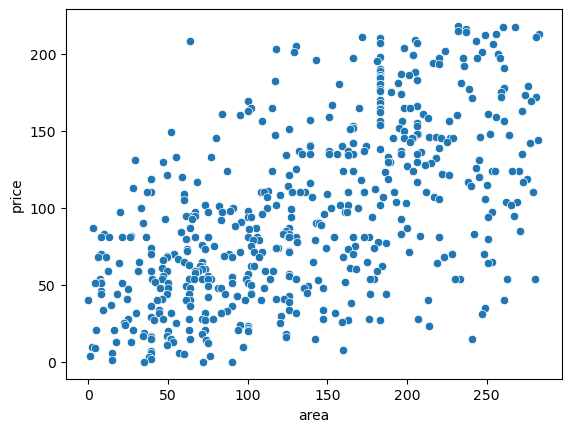

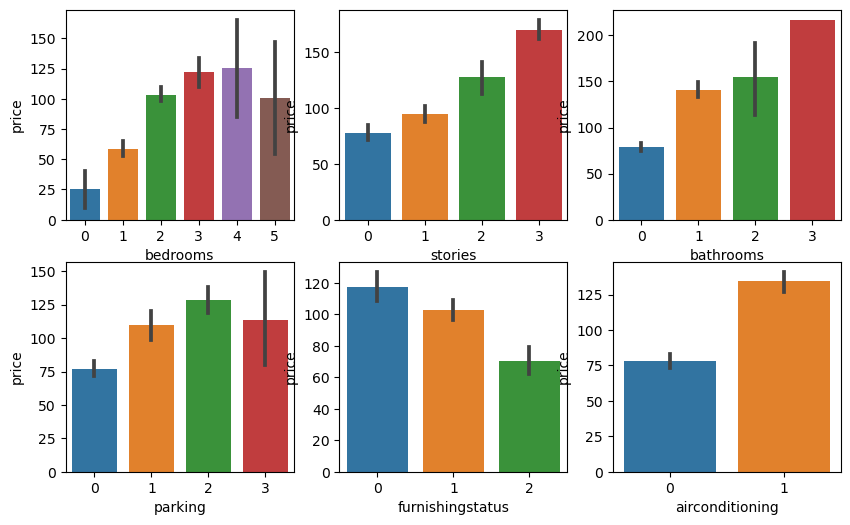

In [2]:
# I copied the dataframe and then imported labelencoder so the values that were objects could be converted into numerical 
# values and then be plotted.
# scatterplot between area and price and then a subplots(bar plots)

copy = df.copy()


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



for i in copy:
    copy[i] = le.fit_transform(copy[i])



copy.corr()


def scatter(copy):
    sns.scatterplot(copy,x='area',y='price')
    plt.plot()


scatter(copy)




def bar(copy):
    bar, ax1 = plt.subplots(2,3,figsize=(10,6))
    sns.barplot(copy,x='bedrooms',y='price',ax = ax1[0,0])
    sns.barplot(copy,x='stories',y='price',ax= ax1[0,1])
    sns.barplot(copy,x='bathrooms',y='price',ax = ax1[0,2])
    sns.barplot(copy,x='parking',y='price',ax = ax1[1,0])
    sns.barplot(copy,x='furnishingstatus',y='price',ax=ax1[1,1])
    sns.barplot(copy,x='airconditioning',y='price',ax=ax1[1,2])
    plt.show()
    
    
bar(copy)



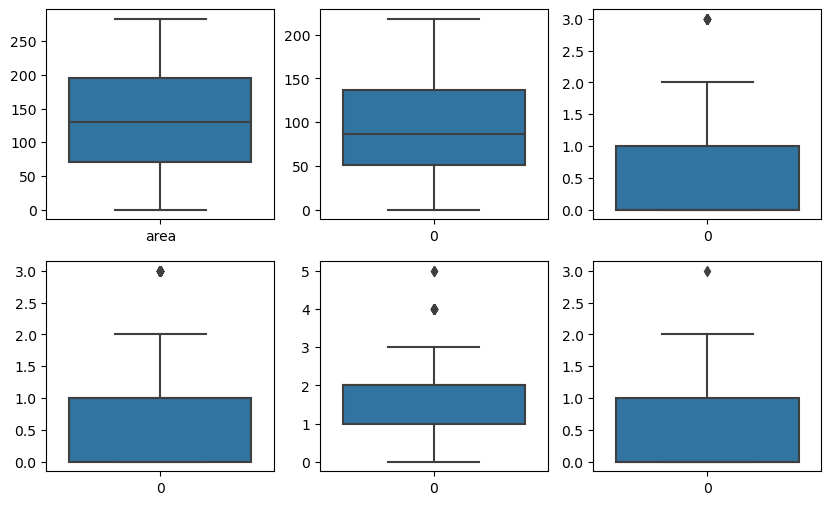

In [3]:
# Boxplots

def box(copy):
    box0, ax2 = plt.subplots(2,3,figsize=(10,6))
    sns.boxplot(copy[['area']],ax=ax2[0,0])
    sns.boxplot(copy['price'],ax=ax2[0,1])
    sns.boxplot(copy['parking'],ax=ax2[0,2])
    sns.boxplot(copy['stories'],ax=ax2[1,0])
    sns.boxplot(copy['bedrooms'],ax=ax2[1,1])
    sns.boxplot(copy['bathrooms'],ax=ax2[1,2])
    plt.show()
    
box(copy)

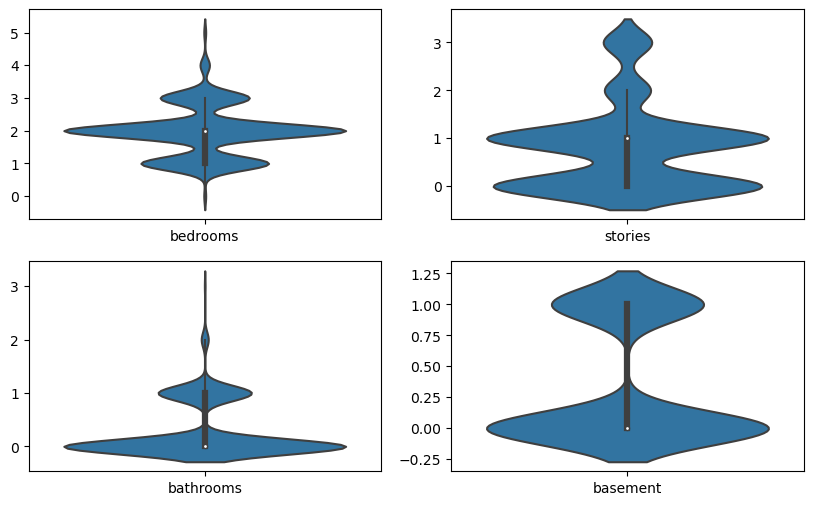

In [4]:
# Violine plots for relevant data
def violin(copy):
    dis_,axs__ = plt.subplots(2,2,figsize=(10,6))
    sns.violinplot(copy[['bedrooms']],ax=axs__[0,0])
    sns.violinplot(copy[['stories']],ax=axs__[0,1])
    sns.violinplot(copy[['bathrooms']],ax=axs__[1,0])
    sns.violinplot(copy[['basement']],ax=axs__[1,1])
    plt.show()
    

violin(copy)

In [5]:
# train/test split, linear regression because price is continuous and the dependent variables
X = df.drop('price',axis=1)
y = df.price

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)



from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor




lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
gb = GradientBoostingRegressor()


In [7]:
#onehotencoder and then a pipeline due to many features being categorical and string
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer

ohe = OneHotEncoder()

ct = make_column_transformer(
    (ohe,['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
     ),remainder='passthrough')



ct.fit_transform(X)


from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(ct,lr).fit(X_train,y_train)
pred_lr = pipe_lr.predict(X_test)

pipe_rf = make_pipeline(ct,rf).fit(X_train,y_train)
pred_rf = pipe_rf.predict(X_test)

pipe_tree = make_pipeline(ct,dt).fit(X_train,y_train)
tree_pred = pipe_tree.predict(X_test)


pipe_gb = make_pipeline(ct,gb).fit(X_train,y_train)
gb_pred = pipe_gb.predict(X_test)

In [8]:
# model evaluation; scoring method: R_2 score and MSE
from sklearn.metrics import r2_score,mean_squared_error

def evaluate_model(model_name,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    print(f'{model_name} - R-squared: {r2:.2f}, MSE: {mse:.2f}')
    
    

evaluate_model('Linear Regression', y_test,pred_lr)
evaluate_model('Random Forest', y_test,pred_rf)
evaluate_model('Decision Trees', y_test,tree_pred)
evaluate_model('Gradient Boosting', y_test,gb_pred)

Linear Regression - R-squared: 0.65, MSE: 1754318687330.69
Random Forest - R-squared: 0.61, MSE: 1966346315138.32
Decision Trees - R-squared: 0.41, MSE: 2957972211009.17
Gradient Boosting - R-squared: 0.67, MSE: 1689080107257.78
